In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
print(x)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

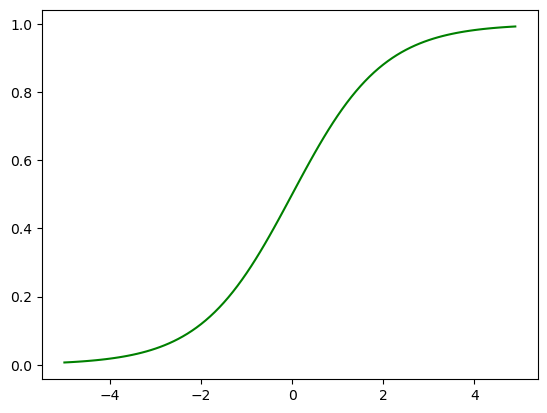

In [4]:
plt.plot(x,y,'g')

In [5]:
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

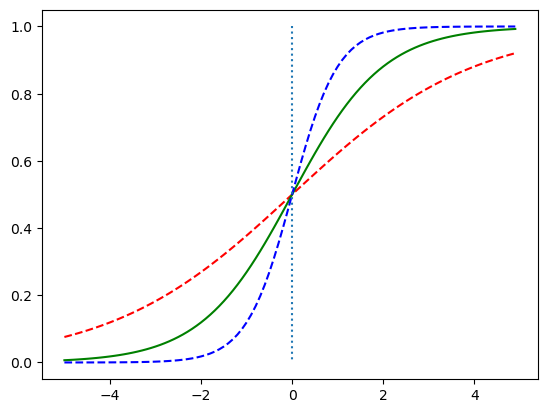

In [6]:
plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0.0,0.0], [1.0, 0.0],':')

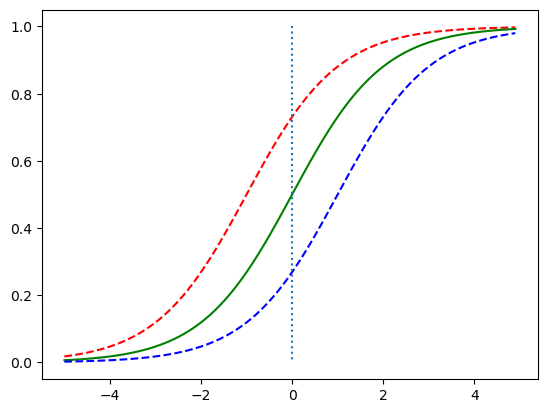

In [7]:
y1 = sigmoid(x+1)
y2 = sigmoid(x)
y3 = sigmoid(x-1)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0.0,0.0], [1.0, 0.0],':')

In [8]:
x_data1 = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(10,1)
t_data1 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(10,1)
w = np.random.rand(1,1)
b = np.random.rand(1)
print(w,b)

[[0.67835746]] [0.9292079]


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def loss_func(x, t):
    delta = 1e-7 # delta는 아주 작은 값을 넣어 y=0이 되는 것을 막기위한 장치
    z = np.dot(x,w) +b
    y = sigmoid(z)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))  # 이 때 손실함수는 1,0에 따라 앞의 식이 또는 뒤의 식이 적용되는 방식

In [11]:
def numerical_derivative(f,x):
    delta_x=1e-4
    grad=np.zeros_like(x)

    it=np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    # flags : c_index(1차원 array일때), multi_index(2차원 이상일 때)
    # op_flags : 읽기/쓰기 옵션설정,default :readonly

    while not it.finished:
        idx=it.multi_index
        print('idx:',idx, 'x[idx]:',x[idx])
        tmp_val=x[idx]
        x[idx]=float(tmp_val)+delta_x
        fx1=f(x)
        x[idx]=float(tmp_val)-delta_x
        fx2=f(x)
        grad[idx]=(fx1-fx2)/(2*delta_x)
        print('grad[idx]:', grad[idx])
        print('grad:', grad)

        x[idx]=tmp_val
        it.iternext()

    return grad

In [12]:
def predict(x):
    z = np.dot(x, w) +b
    y = sigmoid(z)

    if y>=0.5:
        result = 1
    else:
        result = 0
    return y, result

In [13]:
learning_rate=1e-6

f=lambda x: loss_func(x_data1, t_data1)

print("Initial error value=", loss_func(x_data1, t_data1), "Initial w=", w, "b=",b)

for step in range(20001):
    w-=learning_rate*numerical_derivative(f, w)
    b-=learning_rate*numerical_derivative(f, b)

    if step % 400==0:
        print("step=", step, "error value=", loss_func(x_data1, t_data1), "w=", w, "b=",b)

Initial error value= 25.128200382088806 Initial w= [[0.67835746]] b= [0.9292079]
idx: (0, 0) x[idx]: 0.678357460509285
grad[idx]: 29.650064081518934
grad: [[29.65006408]]
idx: (0,) x[idx]: 0.9292079026383306
grad[idx]: 4.87284678715838
grad: [4.87284679]
step= 0 error value= 25.12729751164953 w= [[0.67832781]] b= [0.92920303]
idx: (0, 0) x[idx]: 0.6783278104452035
grad[idx]: 29.650029104910658
grad: [[29.6500291]]
idx: (0,) x[idx]: 0.9292030297915435
grad[idx]: 4.8728365918826455
grad: [4.87283659]
idx: (0, 0) x[idx]: 0.6782981604160986
grad[idx]: 29.649994116169864
grad: [[29.64999412]]
idx: (0,) x[idx]: 0.9291981569549516
grad[idx]: 4.872826400159624
grad: [4.8728264]
idx: (0, 0) x[idx]: 0.6782685104219824
grad[idx]: 29.649959128690284
grad: [[29.64995913]]
idx: (0,) x[idx]: 0.9291932841285514
grad[idx]: 4.872816210141906
grad: [4.87281621]
idx: (0, 0) x[idx]: 0.6782388604628538
grad[idx]: 29.649924134460548
grad: [[29.64992413]]
idx: (0,) x[idx]: 0.9291884113123413
grad[idx]: 4.8728

In [14]:
(real_val, logical_val) = predict(9)
print(real_val, logical_val)

[[0.87433696]] 1


In [15]:
(real_val, logical_val) = predict(15)
print(real_val, logical_val)

[[0.93551774]] 1


In [16]:
(real_val, logical_val) = predict(3)
print(real_val, logical_val)

[[0.76941549]] 1


In [17]:
(real_val, logical_val) = predict(1)
print(real_val, logical_val)

[[0.72313468]] 1


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

In [19]:
x_data1 = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(10,1)
t_data1 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(10,1)
x_train = torch.from_numpy(x_data1).float()
t_train = torch.from_numpy(t_data1).float()
print(x_train)
print(t_train)

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.],
        [16.],
        [18.],
        [20.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [20]:
w = torch.zeros((1,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w,b)
optimizer= optim.SGD([w,b], lr=0.1)

epochs = 1001

tensor([[0.]], requires_grad=True) tensor([0.], requires_grad=True)


In [21]:
for epoch in range(epochs):
    z = x_train.matmul(w)+b #회귀분석식
    y = torch.sigmoid(z)
    cost = -(t_train*torch.log(y)+(1-t_train)*torch.log(1-y)).mean()
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100 ==0:
        print('Epoch:', epoch, 'Cost:', cost.item())

Epoch: 0 Cost: 0.6931471824645996
Epoch: 100 Cost: 0.42268043756484985
Epoch: 200 Cost: 0.2970641851425171
Epoch: 300 Cost: 0.2505585551261902
Epoch: 400 Cost: 0.22115544974803925
Epoch: 500 Cost: 0.2005254030227661
Epoch: 600 Cost: 0.18509434163570404
Epoch: 700 Cost: 0.17301277816295624
Epoch: 800 Cost: 0.16322675347328186
Epoch: 900 Cost: 0.15509018301963806
Epoch: 1000 Cost: 0.1481836587190628


In [22]:
x_test = torch.FloatTensor([[9],[13],[17],[15]])
y2 = torch.sigmoid(x_test.matmul(w)+b)
result = y2>=0.5
print(y2)
print(result)

tensor([[0.3060],
        [0.7983],
        [0.9726],
        [0.9222]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [ True],
        [ True],
        [ True]])


## nn.Module 사용

In [23]:
torch.manual_seed(1)
x_data = [[1,2],[2,3],[1,4],[3,9],[2,7],[3,4]]
y_data = [[0],[0],[0],[0],[0],[0]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


In [24]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [25]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.2648],
        [0.1355],
        [0.1689],
        [0.4274]], grad_fn=<SigmoidBackward0>)

In [26]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 1001
costs = []
accuracys =[]

In [27]:
for epoch in range(epochs):
    h = model(x_train)
    cost = F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())
    pred=h>=torch.FloatTensor([0.5])
    correct_pred = pred.float() == y_train
    accuracy = correct_pred.sum().item()/len(correct_pred)
    accuracys.append(accuracy)
    
    if epoch%100 == 0:
        print('epoch:', epoch, 'cost:', cost.item(), 'accuracy:', accuracy)

epoch: 0 cost: 0.3742862641811371 accuracy: 1.0
epoch: 100 cost: 0.01041410956531763 accuracy: 1.0
epoch: 200 cost: 0.005728512536734343 accuracy: 1.0
epoch: 300 cost: 0.004010347183793783 accuracy: 1.0
epoch: 400 cost: 0.0031048625241965055 accuracy: 1.0
epoch: 500 cost: 0.0025417825672775507 accuracy: 1.0
epoch: 600 cost: 0.0021562136244028807 accuracy: 1.0
epoch: 700 cost: 0.0018749190494418144 accuracy: 1.0
epoch: 800 cost: 0.0016602493124082685 accuracy: 1.0
epoch: 900 cost: 0.0014908247394487262 accuracy: 1.0
epoch: 1000 cost: 0.0013535659527406096 accuracy: 1.0


Text(0.5, 1.0, 'costs')

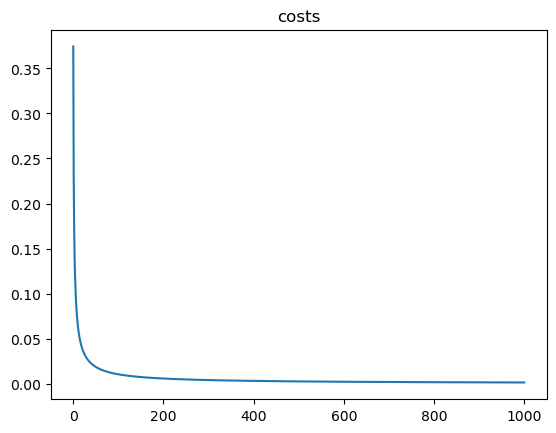

In [28]:
s1 = pd.Series(costs)
plt.plot(s1)
plt.title('costs')

Text(0.5, 1.0, 'accuracys')

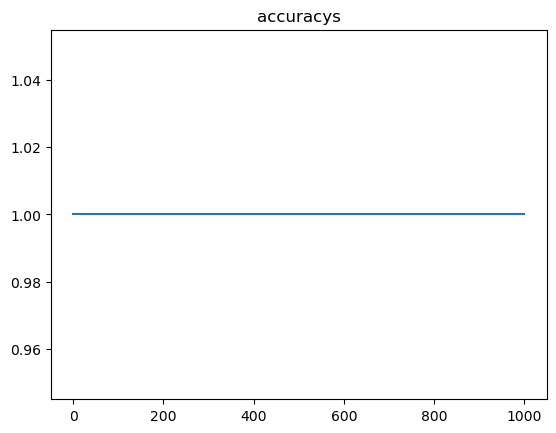

In [29]:
s2 = pd.Series(accuracys)
plt.plot(s2)
plt.title('accuracys')

In [30]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [31]:
model = BinaryClassifier()
print(list(model.parameters()))
optimizer= optim.SGD(model.parameters(), lr=0.1)

[Parameter containing:
tensor([[ 0.3319, -0.6657]], requires_grad=True), Parameter containing:
tensor([0.4241], requires_grad=True)]


In [32]:
epochs = 1001
accuracys1 = []
costs1 =[]

In [33]:
for epoch in range(epochs):
    h = model(x_train)
    cost1 = F.binary_cross_entropy(h, y_train)
    optimizer.zero_grad()
    cost1.backward()
    optimizer.step()

    predict=h>=torch.FloatTensor([0.5])
    correct_predict = predict.float() == y_train
    accuracy1 = correct_predict.sum().item()/len(correct_predict)
    costs1.append(cost.item())
    accuracys1.append(accuracy1)

    if epoch%100==0:
        print('epoch:', epoch, 'cost:', cost1.item(), 'accuracy:', accuracy1 )

epoch: 0 cost: 0.2024565488100052 accuracy: 1.0
epoch: 100 cost: 0.011252119205892086 accuracy: 1.0
epoch: 200 cost: 0.00615415396168828 accuracy: 1.0
epoch: 300 cost: 0.004285864997655153 accuracy: 1.0
epoch: 400 cost: 0.0033043751027435064 accuracy: 1.0
epoch: 500 cost: 0.0026959774550050497 accuracy: 1.0
epoch: 600 cost: 0.0022805880289524794 accuracy: 1.0
epoch: 700 cost: 0.0019783235620707273 accuracy: 1.0
epoch: 800 cost: 0.0017481893301010132 accuracy: 1.0
epoch: 900 cost: 0.0015669395215809345 accuracy: 1.0
epoch: 1000 cost: 0.001420377753674984 accuracy: 1.0


Text(0.5, 1.0, 'costs')

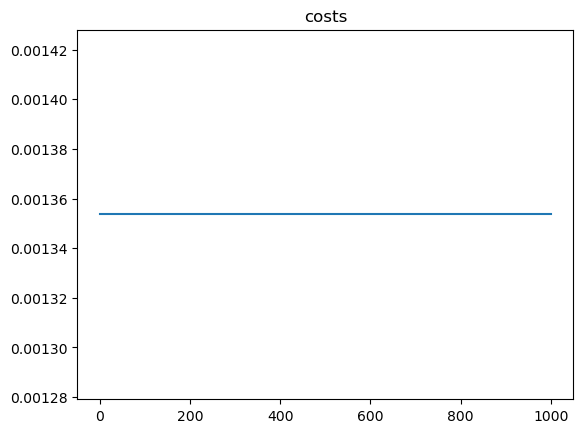

In [34]:
plt.plot(pd.Series(costs1))
plt.title('costs')

Text(0.5, 1.0, 'accuracys')

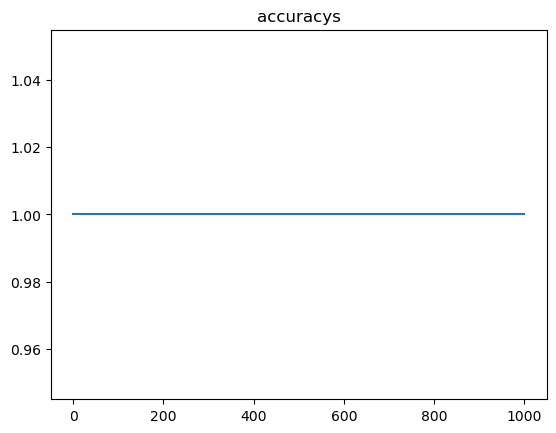

In [35]:
plt.plot(pd.Series(accuracys))
plt.title('accuracys')